In [2]:
from __future__ import print_function
import os.path
import dalmatian as dm
import pandas as pd
import sys
sys.path.insert(0, '../')
from CCLE_postp_function import CreateDatasetWithNewCellLines
sys.path.insert(0, '../../JKBio/')
import datanalytics as da 
import TerraFunction as terra
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
from taigapy import TaigaClient
tc = TaigaClient()

In [3]:
refnamespace="broad-firecloud-ccle"
refworkspace="DepMap_hg38_RNAseq"
source="Unknown"
samplesetname="james_rna"
gcpfolder= 'jkobject'
prefix='rnaseq_james/'
release = samplesetname

In [4]:
refwm = dm.WorkspaceManager(refnamespace, refworkspace)

# Generate sample set from new samples

In [13]:
terra.UploadFromFolder(gcpfolder, prefix, refwm, samplesetname=samplesetname, sep='@')

please be sure you gave access to your terra email account access to this bucket
unrecognized file type : rnaseq_james/
{'sample_id': ['A0029D_1', 'A0029D_2', 'A0029D_3', 'A0029T_1', 'A0029T_2', 'A0029T_3', 'A0069D_1', 'A0069D_2', 'A0069D_3', 'A0069T_1', 'A0069T_2', 'A0069T_3', 'A0087D_1', 'A0087D_2', 'A0087D_3', 'A0087T_1', 'A0087T_2', 'A0087T_3', 'A0233D_1', 'A0233D_2', 'A0233D_3', 'A0233T_1', 'A0233T_2', 'A0233T_3', 'A0368D_1', 'A0368D_2', 'A0368D_3', 'A0368T_1', 'A0368T_2', 'A0368T_3', 'A0405D_1', 'A0405D_2', 'A0405D_3', 'A0405T_1', 'A0405T_2', 'A0405T_3', 'A0407D_1', 'A0407D_2', 'A0407D_3', 'A0407T_1', 'A0407T_2', 'A0407T_3', 'A0465D_1', 'A0465D_2', 'A0465D_3', 'A0465T_1', 'A0465T_2', 'A0465T_3'], 'fastq1': ['gs://jkobject/rnaseq_james/A0029D_1_1.fq.gz', 'gs://jkobject/rnaseq_james/A0029D_2_1.fq.gz', 'gs://jkobject/rnaseq_james/A0029D_3_1.fq.gz', 'gs://jkobject/rnaseq_james/A0029T_1_1.fq.gz', 'gs://jkobject/rnaseq_james/A0029T_2_1.fq.gz', 'gs://jkobject/rnaseq_james/A0029T_3_1.fq.

# run the pipeline

### if submitted as bams

In [41]:
samtofastq = refwm.get_config("samtofastq_v1-0_BETA_cfg")
samtofastq

{'deleted': False,
 'inputs': {'samtofastq_workflow.samtofastq.prefix': 'this.name',
  'samtofastq_workflow.samtofastq.disk_space': '50',
  'samtofastq_workflow.samtofastq.num_threads': '1',
  'samtofastq_workflow.samtofastq.memory': '3',
  'samtofastq_workflow.samtofastq.num_preempt': '5',
  'samtofastq_workflow.samtofastq.input_bam_cram': 'this.WES_bam'},
 'methodConfigVersion': 2,
 'methodRepoMethod': {'methodName': 'samtofastq_v1-0_BETA',
  'methodVersion': 5,
  'methodNamespace': 'broadinstitute_gtex',
  'methodUri': 'agora://broadinstitute_gtex/samtofastq_v1-0_BETA/5',
  'sourceRepo': 'agora'},
 'name': 'samtofastq_v1-0_BETA_cfg',
 'namespace': 'broadinstitute_gtex',
 'outputs': {'samtofastq_workflow.samtofastq.fastq1': 'this.fastq1',
  'samtofastq_workflow.samtofastq.fastq2': 'this.fastq2'},
 'prerequisites': {},
 'rootEntityType': 'sample'}

In [25]:
samtofastq['samtofastq_workflow.samtofastq.input_bam_cram']= 'this.WES_bam'
refwm.update_config(samtofastq)
submission_id = refwm.create_submission(samtofastq['name'], samplesetname,'sample_set',expression='this.samples')


Successfully created submission b09e54b1-4280-440a-9dd3-6926ca793056.


'b09e54b1-4280-440a-9dd3-6926ca793056'

In [ ]:
wait_for_submission(refwm, submission_id1)

### else as fastqs

In [14]:
star = refwm.get_config("star_v1-0_BETA_cfg")
star

{'deleted': False,
 'inputs': {'star_workflow.star.outSAMattrRGline': '"ID:rg1 SM:sm1"',
  'star_workflow.star.num_threads': '8',
  'star_workflow.star.alignSoftClipAtReferenceEnds': '"Yes"',
  'star_workflow.star.alignMatesGapMax': '1000000',
  'star_workflow.star.outFilterType': '"BySJout"',
  'star_workflow.star.prefix': 'this.name',
  'star_workflow.star.num_preempt': '5',
  'star_workflow.star.alignSJoverhangMin': '8',
  'star_workflow.star.chimOutJunctionFormat': '1',
  'star_workflow.star.memory': '52',
  'star_workflow.star.fastq2': 'this.fastq2',
  'star_workflow.star.outFilterMismatchNoverLmax': '0.1',
  'star_workflow.star.alignIntronMax': '1000000',
  'star_workflow.star.star_index': 'workspace.star_index',
  'star_workflow.star.outSAMattributes': '"NH HI AS nM NM ch"',
  'star_workflow.star.outSAMstrandField': '"intronMotif"',
  'star_workflow.star.limitSjdbInsertNsj': '1200000',
  'star_workflow.star.chimSegmentMin': '15',
  'star_workflow.star.chimJunctionOverhangMin': '

In [15]:
refwm.update_config(star)
submission_id = refwm.create_submission(star['name'], samplesetname,'sample_set',expression='this.samples')

Successfully updated configuration broadinstitute_gtex/star_v1-0_BETA_cfg
Successfully created submission 35318d38-6fa8-400e-b39c-a3f3627230af.


In [ ]:
terra.wait_for_submission(refwm, submission_id)

In [4]:
rsem = refwm.get_config("rsem_v1-0_BETA_cfg")
rsem

{'deleted': False,
 'inputs': {'rsem_workflow.rsem.transcriptome_bam': 'this.star_transcriptome_bam',
  'rsem_workflow.rsem.max_frag_len': '1000',
  'rsem_workflow.rsem.memory': '50',
  'rsem_workflow.rsem.prefix': 'this.name',
  'rsem_workflow.rsem.disk_space': '100',
  'rsem_workflow.rsem.estimate_rspd': '"true"',
  'rsem_workflow.rsem.is_stranded': '"false"',
  'rsem_workflow.rsem.rsem_reference': 'workspace.rsem_reference',
  'rsem_workflow.rsem.num_preempt': '5',
  'rsem_workflow.rsem.num_threads': '2'},
 'methodConfigVersion': 4,
 'methodRepoMethod': {'methodName': 'rsem_v1-0_BETA',
  'methodVersion': 4,
  'methodNamespace': 'broadinstitute_gtex',
  'methodUri': 'agora://broadinstitute_gtex/rsem_v1-0_BETA/4',
  'sourceRepo': 'agora'},
 'name': 'rsem_v1-0_BETA_cfg',
 'namespace': 'broadinstitute_gtex',
 'outputs': {'rsem_workflow.rsem.genes': 'this.rsem_genes',
  'rsem_workflow.rsem.isoforms': 'this.rsem_isoforms'},
 'prerequisites': {},
 'rootEntityType': 'sample'}

In [5]:
refwm.update_config(rsem)
submission_id1 = refwm.create_submission(rsem['name'], samplesetname,'sample_set',expression='this.samples')

Successfully updated configuration broadinstitute_gtex/rsem_v1-0_BETA_cfg
Successfully created submission a52b20b8-64f8-4cf5-bfaf-0fc45550ac25.


In [ ]:
terra.wait_for_submission(refwm, submission_id1)

In [6]:
fusion = refwm.get_config("hg38_STAR_fusion") 
fusion

{'deleted': False,
 'inputs': {'trinity_cleaned.StarFusion.ref_genome_fa_star_idx_files': 'workspace.hg38_star_fusion_ctat_star_index_files',
  'trinity_cleaned.samtofastq.num_preempt': '4',
  'trinity_cleaned.StarFusion.memory': '64',
  'trinity_cleaned.remove_intermediate_files': 'true',
  'trinity_cleaned.StarFusion.num_preempt': '2',
  'trinity_cleaned.StarFusion.ctat_genome_lib_build_dir_files': 'workspace.hg38_star_fusion_ctat_files',
  'trinity_cleaned.prefix': 'this.name',
  'trinity_cleaned.StarFusion.num_threads': '8',
  'trinity_cleaned.samtofastq.memory': '16',
  'trinity_cleaned.samtofastq.num_threads': '1',
  'trinity_cleaned.samtofastq.input_bam': 'this.WES_bam',
  'trinity_cleaned.StarFusion.disk_space': '500',
  'trinity_cleaned.StarFusion.docker': '"trinityctat/ctatfusion:1.6.0"',
  'trinity_cleaned.samtofastq.disk_space': '100'},
 'methodConfigVersion': 7,
 'methodRepoMethod': {'methodName': 'STAR_fusion',
  'methodVersion': 14,
  'methodNamespace': 'gkugener',
  'me

In [7]:
fusion['inputs']['trinity_cleaned.samtofastq.input_bam'] = 'this.WES_bam'
refwm.update_config(fusion)
submission_id2 = refwm.create_submission(fusion['name'], samplesetname,'sample_set',expression='this.samples')

Successfully updated configuration gkugener/hg38_STAR_fusion
Successfully created submission 31bb3c99-40c0-43fa-aa80-3494166b9d22.


In [ ]:
wait_for_submission(refwm, submission_id1)

In [4]:
aggregate = refwm.get_config("rsem_aggregate_results_v1-0_BETA_cfg")
aggregate

{'deleted': False,
 'inputs': {'rsem_aggregate_results_workflow.rsem_aggregate_results.rsem_genes': 'this.samples.rsem_genes',
  'rsem_aggregate_results_workflow.rsem_aggregate_results.num_preempt': '5',
  'rsem_aggregate_results_workflow.rsem_aggregate_results.prefix': 'this.name',
  'rsem_aggregate_results_workflow.rsem_aggregate_results.num_threads': '2',
  'rsem_aggregate_results_workflow.rsem_aggregate_results.rsem_isoforms': 'this.samples.rsem_isoforms',
  'rsem_aggregate_results_workflow.rsem_aggregate_results.disk_space': '50',
  'rsem_aggregate_results_workflow.rsem_aggregate_results.memory': '13'},
 'methodConfigVersion': 3,
 'methodRepoMethod': {'methodName': 'rsem_aggregate_results_v1-0_BETA',
  'methodVersion': 3,
  'methodNamespace': 'broadinstitute_gtex',
  'methodUri': 'agora://broadinstitute_gtex/rsem_aggregate_results_v1-0_BETA/3',
  'sourceRepo': 'agora'},
 'name': 'rsem_aggregate_results_v1-0_BETA_cfg',
 'namespace': 'broadinstitute_gtex',
 'outputs': {'rsem_aggrega

In [5]:
submission_id1 = refwm.create_submission(aggregate['name'], samplesetname)

Successfully created submission 089edd9a-220c-4c40-a956-9f0ae5c242d0.


## Expression post processing

In [5]:
terra.wait_for_submission(refwm, submission_id1)

In [5]:
%%R
source('../JKBio/gkugener/RScripts/load_libraries_and_annotations.R')

2019-06-24 09:18:13::WARNING  R[write to console]: 
Attaching package: ‘dplyr’


2019-06-24 09:18:13::WARNING  R[write to console]: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


2019-06-24 09:18:13::WARNING  R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


2019-06-24 09:18:13::WARNING  R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


2019-06-24 09:18:14::WARNING  R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

2019-06-24 09:18:14::WARNING  R[write to console]: ✔ ggplot2 3.1.1     ✔ readr   1.3.1
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ ggplot2 3.1.1     ✔ forcats 0.4.0

2019-06-24 09:18:14::WARNING  R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts()

2019-06-24 09:18:16::WARNING  R[write to console]: The following objects are masked from ‘package:data.table’:

    first, second


2019-06-24 09:18:16::WARNING  R[write to console]: The following object is masked from ‘package:plotly’:

    rename


2019-06-24 09:18:16::WARNING  R[write to console]: The following object is masked from ‘package:tidyr’:

    expand


2019-06-24 09:18:16::WARNING  R[write to console]: The following objects are masked from ‘package:dplyr’:

    first, rename


2019-06-24 09:18:16::WARNING  R[write to console]: The following object is masked from ‘package:plyr’:

    rename


2019-06-24 09:18:16::WARNING  R[write to console]: The following object is masked from ‘package:base’:

    expand.grid


2019-06-24 09:18:16::WARNING  R[write to console]: Loading required package: IRanges

2019-06-24 09:18:17::WARNING  R[write to console]: 
Attaching package: ‘IRanges’


2019-06-24 09:18:17::WARNING  R[write to console]: The following object is masked from ‘package:

Fetching https://cds.team/taiga/api/dataset/msigdb-gene-set-collections-8453/2 
Status 200 


2019-06-24 09:18:21::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



loading cached data version from  ~/.taiga/msigdb-gene-set-collections-8453_2.toc 
Checking for cached file ~/.taiga/495ea37b8d744a428946a5628c5fe7ce_gsc-data.raw 


In [10]:
%%R
source('CCLE_postp_function.R')
release <- "james_rna"

In [10]:
res = refwm.get_sample_sets().loc[samplesetname]
res

fusions_star                                                                     NaN
mergedExonUsageRObj_hg38                                                         NaN
rsem_genes_expected_count          gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd5004...
rsem_genes_tpm                     gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd5004...
rsem_transcripts_expected_count    gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd5004...
rsem_transcripts_isopct            gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd5004...
rsem_transcripts_tpm               gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd5004...
samples                            [A0029D_1, A0029D_2, A0029D_3, A0029T_1, A0029...
Name: rnaseq_james, dtype: object

In [11]:
rsem_genes_expected_count = res['rsem_genes_expected_count']
rsem_genes_tpm = res['rsem_genes_tpm']
rsem_transcripts_tpm = res['rsem_transcripts_tpm']
! gsutil cp $rsem_genes_expected_count "temp/expression/expectedcount.txt.gz" & gsutil cp $rsem_genes_tpm "temp/expression/genestpm.txt.gz" & gsutil cp $rsem_transcripts_tpm "temp/expression/transcripttpm.txt.gz"

Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/089edd9a-220c-4c40-a956-9f0ae5c242d0/rsem_aggregate_results_workflow/c4661a92-d6fe-42ca-99fd-3a14056ff10b/call-rsem_aggregate_results/rnaseq_james.rsem_transcripts_tpm.txt.gz...
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/089edd9a-220c-4c40-a956-9f0ae5c242d0/rsem_aggregate_results_workflow/c4661a92-d6fe-42ca-99fd-3a14056ff10b/call-rsem_aggregate_results/rnaseq_james.rsem_genes_tpm.txt.gz...
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/089edd9a-220c-4c40-a956-9f0ae5c242d0/rsem_aggregate_results_workflow/c4661a92-d6fe-42ca-99fd-3a14056ff10b/call-rsem_aggregate_results/rnaseq_james.rsem_genes_expected_count.txt.gz...
/ [1 files][  3.0 MiB/  3.0 MiB]                                                
Operation completed over 1 objects/3.0 MiB.                                      
/ [1 files][  3.2 MiB/  3.2 MiB]                                                
Operation completed over 1 objects/3.2 MiB.

In [16]:
%%R
# These files are downloaded from FireCloud/Terra
download_paths <- list(
  tpm_genes='temp/expression/genestpm.txt.gz',
  tpm_transcripts='temp/expression/transcripttpm.txt.gz',
  counts_genes='temp/expression/expectedcount.txt.gz')

In [18]:
%%R
tpm_transcripts = readTranscripts(download_paths$tpm_transcripts)
counts_genes = readCounts(download_paths$counts_genes)
tpm_genes = readTPM(download_paths$tpm_genes)

2019-06-24 09:25:08::WARNING  R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  transcript_id = col_character(),
  gene_id = col_character()
)

2019-06-24 09:25:08::WARNING  R[write to console]: See spec(...) for full column specifications.

2019-06-24 09:25:11::WARNING  R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character(),
  `transcript_id(s)` = col_character()
)

2019-06-24 09:25:11::WARNING  R[write to console]: See spec(...) for full column specifications.

2019-06-24 09:25:13::WARNING  R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character(),
  `transcript_id(s)` = col_character()
)

2019-06-24 09:25:13::WARNING  R[write to console]: See spec(...) for full column specifications.



In [11]:
%%R
# Fix the colnames (for cases where there are mixed values (CCLE_name and DepMap_IDs))
colnames(counts_genes) %<>% renameFunction(.)
colnames(tpm_genes) %<>% renameFunction(.)
colnames(tpm_transcripts) %<>% renameFunction(.)

### data exploration and QC

In [14]:
%%R 
# Quick QC
# We are looking for samples with a worrying amount of zeros
zero_threshold <- 39000

number_zeros <- apply(tpm_genes[,3:ncol(tpm_genes)], 2, FUN = function(x) length(x[x == 0]))
nzdf <- data.frame(CL=names(number_zeros), nz=number_zeros, stringsAsFactors = F)

In [15]:
%%R
# Plot of the samples that fail
plot <- ggplot(nzdf, aes(nz)) +
  geom_histogram(bins = 100, color='black', fill='white') +
  geom_vline(xintercept = zero_threshold, linetype=2) +
  geom_label_repel(data = nzdf %>% filter(nz > zero_threshold), aes(x=nz, y=0, label=CL), size=5, fill=rgb(1,1,1,0.5))

ggsave(plot, filename ='temp/ggplot.pdf', width=20, height = 20)

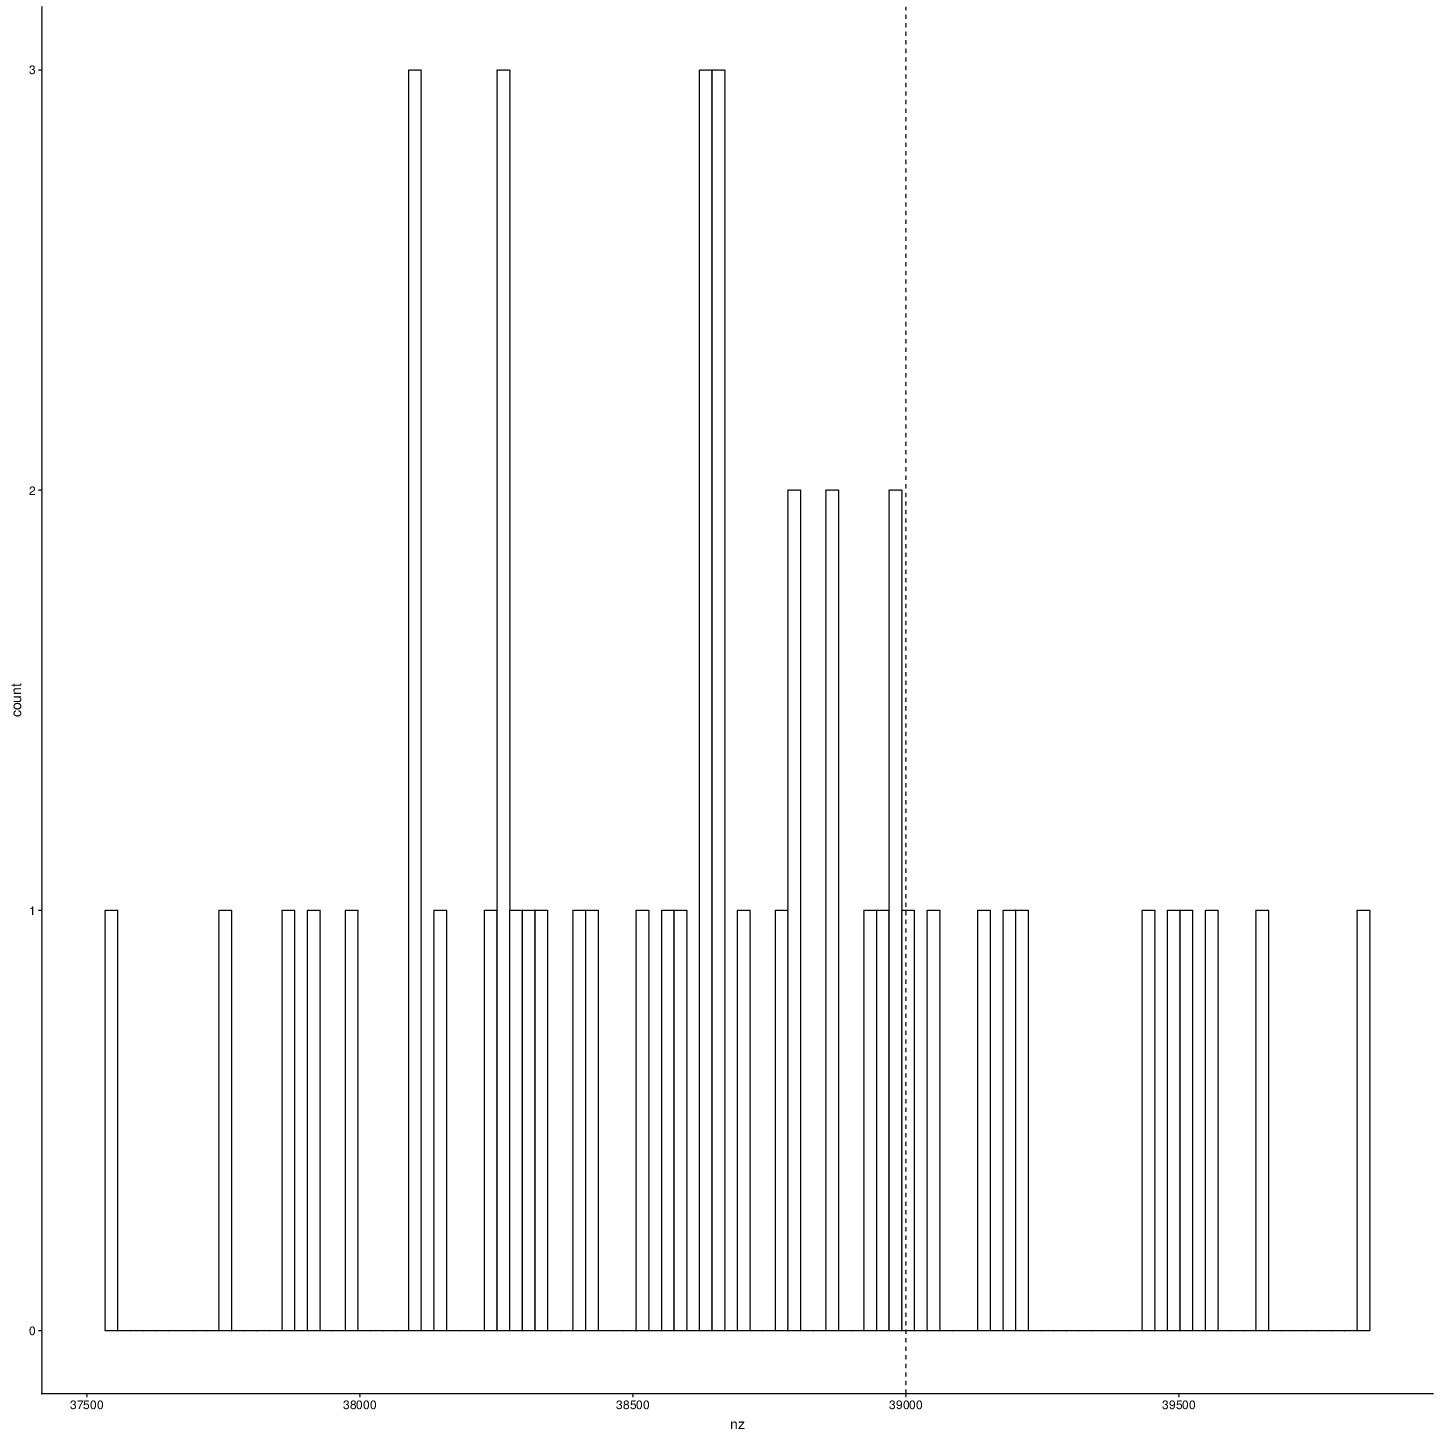

In [17]:
from wand.image import Image as WImage
img = WImage(filename='temp/ggplot.pdf')
img

In [18]:
%%R
pass <- number_zeros[order(-number_zeros)] %>% .[. < zero_threshold] %>% names()

# These samples failed
setdiff(colnames(tpm_genes), pass) %>% .[!(. %in% c('gene_id', 'transcript_id(s)'))]

counts_genes %<>% dplyr::select(c("gene_id","transcript_id(s)", pass))
tpm_genes %<>% dplyr::select(c("gene_id","transcript_id(s)", pass))
tpm_transcripts %<>% dplyr::select("transcript_id", "gene_id", pass)

2019-06-24 06:56:28::WARNING  R[write to console]: Error: Columns `3`, `4`, `5`, `6`, `7`, ... cannot have NA as name

2019-06-24 06:56:28::WARNING  R[write to console]: In addition: 
2019-06-24 06:56:28::WARNING  R[write to console]: Warning messages:

2019-06-24 06:56:28::WARNING  R[write to console]: 1: 
2019-06-24 06:56:28::WARNING  R[write to console]: In taiga2.resolve.id(data.id, data.name, data.version, data.dir,  :
2019-06-24 06:56:28::WARNING  R[write to console]: 
 
2019-06-24 06:56:28::WARNING  R[write to console]:  No filename passed, getting the first one by default

2019-06-24 06:56:28::WARNING  R[write to console]: 2: Removed 11 rows containing missing values (geom_label_repel). 




Error: Columns `3`, `4`, `5`, `6`, `7`, ... cannot have NA as name


In [19]:
%%R
pass

 [1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[26] NA NA NA NA NA NA NA NA NA NA NA NA


## Save files for taiga

In [22]:
%%R
write.table(
  counts_genes, 
  file = paste0('temp/expression.', release,'.counts.tsv'), 
  sep = '\t', row.names = F, quote = F)
write.table(
  tpm_genes, 
  file = paste0('temp/expression.', release,'.tpm.tsv'), 
  sep = '\t', row.names = F, quote = F)
write.table(
  tpm_transcripts, 
  file = paste0('temp/expression.', release,'.transcripts.tsv'),
  sep = '\t', row.names = F, quote = F)

In [ ]:
! mv 

# validation

In [11]:
upload_file_path_dict={'../data/james_rna/expression.'+ release + '.transcripts.tsv': 'TableTSV',
                          '../data/james_rna/expression.'+ release + '.counts.tsv': 'TableTSV',
                          '../data/james_rna/expression.'+ release + '.tpm.tsv': 'TableTSV'}

In [10]:

tc.create_dataset(dataset_name=release,
    dataset_description='Here is the rna seq data processed for James McFarland by Jeremie Kalfon using the CCLE processing pipeline. Some Cell lines have been flagged as containing many zero valued gene. Else the processing went ok.',
    upload_file_path_dict=upload_file_path_dict, folder_id='public')

Uploading expression.james_rna.transcripts...
hitting https://cds.team/taiga/api/datafile/d8d26ed205664dc89fd0bf4106a2e7cd
Conversion and upload...:
	 Uploading to S3

	 Done: expression.james_rna.transcripts properly converted and uploaded
hitting https://cds.team/taiga/api/dataset

Congratulations! Your dataset `james_rna` has been created in the public folder with the id 2d7a6d3133ec46cbaebd333ec719fe74. You can directly access to it with this url: https://cds.team/taiga/dataset/2d7a6d3133ec46cbaebd333ec719fe74



'2d7a6d3133ec46cbaebd333ec719fe74'

In [12]:
tc.update_dataset(dataset_permaname="james-rna-8479",
                     upload_file_path_dict=upload_file_path_dict,
                 dataset_description="Updating to "+release,
                 force_remove=True)


Uploading expression.james_rna.transcripts...
hitting https://cds.team/taiga/api/datafile/894d327b3bd94b58a4465dbdf7984d6e
Conversion and upload...:

	 Done: expression.james_rna.transcripts properly converted and uploaded
Uploading expression.james_rna.counts...
hitting https://cds.team/taiga/api/datafile/894d327b3bd94b58a4465dbdf7984d6e
Conversion and upload...:

	 Done: expression.james_rna.counts properly converted and uploaded
Uploading expression.james_rna.tpm...
hitting https://cds.team/taiga/api/datafile/894d327b3bd94b58a4465dbdf7984d6e
Conversion and upload...:

	 Done: expression.james_rna.tpm properly converted and uploaded
Creating the new version with these files:
	NEW: expression.james_rna.transcripts - TableTSV
	NEW: expression.james_rna.counts - TableTSV
	NEW: expression.james_rna.tpm - TableTSV
hitting https://cds.team/taiga/api/datasetVersion

Dataset version with id 83313f2afb5f4cecb30256a27fbc994b created. You can access to this dataset version directly with this ur

'83313f2afb5f4cecb30256a27fbc994b'

## Fusion post processing

In [ ]:
terra.wait_for_submission(submission_id2)

In [59]:
aggregate = refwm.get_config('Aggregate_Fusion_Calls')
aggregate

{'deleted': False,
 'inputs': {'aggregate_set_files_workflow.aggregate_set_files.disk_space': '250',
  'aggregate_set_files_workflow.aggregate_set_files.output_file_name': '"Fusions.aggregated.tsv"',
  'aggregate_set_files_workflow.aggregate_set_files.aggregate_files_script': 'workspace.aggregate_fusions_script',
  'aggregate_set_files_workflow.aggregate_set_files.num_preempt': '5',
  'aggregate_set_files_workflow.aggregate_set_files.sample_files': 'this.samples.fusion_predictions_abridged',
  'aggregate_set_files_workflow.aggregate_set_files.memory': '3'},
 'methodConfigVersion': 7,
 'methodRepoMethod': {'methodName': 'Aggregate_files_set',
  'methodVersion': 2,
  'methodNamespace': 'gkugener',
  'methodUri': 'agora://gkugener/Aggregate_files_set/2',
  'sourceRepo': 'agora'},
 'name': 'Aggregate_Fusion_Calls',
 'namespace': 'gkugener',
 'outputs': {'aggregate_set_files_workflow.aggregate_set_files.output_merged_file': 'this.fusions_star'},
 'prerequisites': {},
 'rootEntityType': 'sam

In [60]:
refwm.update_config(aggregate)
submission_id2 = refwm.create_submission(aggregate['name'], 'All_samples')

Successfully updated configuration gkugener/Aggregate_Fusion_Calls
Successfully created submission c853b79b-c226-4b29-a718-5875b7f74e10.


In [ ]:
terra.wait_for_submission(submission_id2)

In [10]:
refwm.get_sample_sets().loc['All_samples']['fusions_star']

fusions_star                                                                     NaN
mergedExonUsageRObj_hg38                                                         NaN
rsem_genes_expected_count                                                        NaN
rsem_genes_tpm                                                                   NaN
rsem_transcripts_expected_count                                                  NaN
rsem_transcripts_isopct                                                          NaN
rsem_transcripts_tpm                                                             NaN
samples                            [dm_ACH-000001, dm_ACH-000002, dm_ACH-000003, ...
Name: all_samples, dtype: object

In [37]:
! gsutil cp $aggregated "temp/fusion.Fusions.aggregated.tsv"

Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/15ab70c1-73af-44bc-9aeb-750ef6d70bc8/aggregate_set_files_workflow/7d6bdfe1-27fb-478b-ade1-fcda622c4960/call-aggregate_set_files/Fusions.aggregated.tsv...
/ [1 files][ 30.2 KiB/ 30.2 KiB]                                                
Operation completed over 1 objects/30.2 KiB.                                     


### Overview

This document contains the code used to generate the unfiltered and filtered versions of the fusion datasets for the release. The bottom of the document also contains some comparisons between the release fusion dataset, CCLE2 fusion calls, and the translocation data from CCLE2.

In [20]:
%%R
source("CCLE_postp_function.R")
filepath <- 'temp/fusion.Fusions.aggregated.tsv'

## Generate filtered fusion table

Release: `r release`

We want to apply filters to the fusion table to reduce the number of artifacts in the dataset. Specifically, we filter the following:

* Remove fusions involving mitochondrial chromosomes, or HLA genes, or immunoglobulin genes
* Remove red herring fusions (from STAR-Fusion annotations column)
* Remove recurrent in CCLE (>= 25 samples)
* Remove fusion with (SpliceType=" INCL_NON_REF_SPLICE" and LargeAnchorSupport="No" and FFPM < 0.1)
* Remove fusions with FFPM < 0.05 (STAR-Fusion suggests using 0.1, but looking at the translocation data, this looks like it might be too aggressive)

In [21]:
%%R
unfiltered_fusions <- read_fusions(filepath)
filtered_fusions <- filter_fusions(unfiltered_fusions)

In [37]:
%%R
# Save the files (to be uploaded to taiga)
write.table(
  unfiltered_fusions,
  file = paste0('temp/fusions.',release, '.unfiltered.tsv'),
  sep = '\t', quote = F, row.names = F
)
write.table(
  filtered_fusions,
  file = paste0('temp/fusions.', release, '.filtered.tsv'),
  sep = '\t', quote = F, row.names = F
)

In [38]:
from taigapy import TaigaClient

tc = TaigaClient()
tc.update_dataset(dataset_permaname="depmap-fusions-7990",
                     upload_file_path_dict={'temp/fusions.'+release+'.filtered.tsv': 'TableTSV',
                                        'temp/fusions.'+release+'.unfiltered.tsv': 'TableTSV'},
                 dataset_description="Updating to "+release,
                 force_remove=True)


Now choosing the datasets you would want to keep or remove:
	Keep fusions.19q1.unfiltered ? (y/n) y
	Keep fusions.19q1.filtered ? (y/n) y
Uploading fusions.19Q3interim.filtered...
hitting https://cds.team/taiga/api/datafile/cf2b503f926c4ce2b9ae53301c3d3ea5
Conversion and upload...:

	 Done: fusions.19Q3interim.filtered properly converted and uploaded
Uploading fusions.19Q3interim.unfiltered...
hitting https://cds.team/taiga/api/datafile/cf2b503f926c4ce2b9ae53301c3d3ea5
Conversion and upload...:

	 Done: fusions.19Q3interim.unfiltered properly converted and uploaded
Creating the new version with these files:
	NEW: fusions.19Q3interim.filtered - TableTSV
	NEW: fusions.19Q3interim.unfiltered - TableTSV
	KEEP: fusions.19q1.unfiltered - Columnar
	KEEP: fusions.19q1.filtered - Columnar
hitting https://cds.team/taiga/api/datasetVersion

Dataset version with id 0b90a3c5c37e47c395c67b78c2d74722 created. You can access to this dataset version directly with this url: https://cds.team/taiga/datase

'0b90a3c5c37e47c395c67b78c2d74722'

# IF want to merge here instead of on Terra:

In [20]:
res = refwm.get_samples().loc['ibm_ACH-001616']
genes_fusion = res['fusion_predictions_abridged']
rsem_genes_transcripts = res['rsem_isoforms']
rsem_genes_expected_count = res['rsem_genes']

! gsutil cp $rsem_genes_expected_count "temp/expression.genes.results" && gsutil cp $rsem_genes_transcripts "temp/expression.transcripts.results" && gsutil cp $genes_fusion "temp/expression.fusion.tsv"

Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/25b86d44-d5d3-481a-9c29-5438c9905f44/rsem_workflow/7b23b231-27f3-47c4-b3bb-8df48393b187/call-rsem/ibm_ACH-001616.rsem.genes.results...
/ [1 files][  6.3 MiB/  6.3 MiB]                                                
Operation completed over 1 objects/6.3 MiB.                                      
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/25b86d44-d5d3-481a-9c29-5438c9905f44/rsem_workflow/7b23b231-27f3-47c4-b3bb-8df48393b187/call-rsem/ibm_ACH-001616.rsem.isoforms.results...
Resuming download for temp/expression.transcripts.results                       
/ [1 files][ 13.6 MiB/ 13.6 MiB]                                                
Operation completed over 1 objects/13.6 MiB.                                     
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/988fb43c-f90d-4327-ba52-be47db7d5f46/trinity_cleaned/9570c783-9757-4a32-a569-b98d02b8a7d6/call-StarFusion/attempt-2/ibm_ACH-001616.star-fusi